In [1]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pandas as pd

# 데이터 전처리

In [2]:
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('creditcard.csv')
amount = df['Amount']

print(f'{amount} \n\n {type(amount)} \n\n {amount.shape}')


0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64 

 <class 'pandas.core.series.Series'> 

 (284807,)


In [3]:
amount_val = amount.values # 시리즈의 value값만 가져옴
amount = amount_val.reshape(-1,1) #amount.shape가 [1]이 없기때문에 reshape하여서 빈곳채움

print(f'{amount} \n\n {type(amount)} \n\n {amount.shape}')

[[149.62]
 [  2.69]
 [378.66]
 ...
 [ 67.88]
 [ 10.  ]
 [217.  ]] 

 <class 'numpy.ndarray'> 

 (284807, 1)


In [4]:
scaler = StandardScaler() #가져온거임

scaler.fit(amount)
amount_scaled = scaler.transform(amount)
amount_scaled


array([[ 0.24496426],
       [-0.34247454],
       [ 1.16068593],
       ...,
       [-0.0818393 ],
       [-0.31324853],
       [ 0.51435531]])

In [5]:
df_amount_scaled = pd.DataFrame(amount_scaled) #Array => Dataframe
display(df_amount_scaled) #이래만들면 컬럼명 0으로 나옴

df_amount_scaled.columns = ['normalAmount'] #컬럼명 0을 ''로 설정
df_amount_scaled.rename(columns = {'0' : 'normalAmount'}, inplace = True) #inplace하여 완벽하게 FIX
display(df_amount_scaled)

,0
0,0.244964
1,-0.342475
2,1.160686
3,0.140534
4,-0.073403
...,...
284802,-0.350151
284803,-0.254117
284804,-0.081839
284805,-0.313249


,normalAmount
0,0.244964
1,-0.342475
2,1.160686
3,0.140534
4,-0.073403
...,...
284802,-0.350151
284803,-0.254117
284804,-0.081839
284805,-0.313249


In [6]:
#데이터셋 확인
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.shape

(284807, 31)

In [8]:
df_y = df['Class']


In [9]:
df_x = df.drop('Class',axis = 1).copy()
df_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [10]:
df_x = pd.concat([df_x, df_amount_scaled],axis=1)
df_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normalAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,-0.313249


In [11]:
df = pd.concat([df_x, df_y],axis=1)
df = df.drop('Amount',axis = 1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,normalAmount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [12]:
df.to_csv('credit_test.csv')
df = pd.read_csv('credit_test.csv', index_col=0)

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,normalAmount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


-----

# Train set : Test set = 85 : 15 (4번)

In [14]:
X =df.values[:,0:30] #독립변수
Y =df.values[:,30] #종속변수 , 30만
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.15) #85 : 15니까
print(X_train.shape) # 85프로
print(X_test.shape) #15프로

(242085, 30)
(42722, 30)


# DNN 학습 및 저장 / 정확도, Loss 그래프

In [15]:
#모델 설정
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=X.shape[1]))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics= ['accuracy'])

# #모델 저장 폴더 지정
MODEL_DIR='./credit/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# #모델 저장 방법
modelpath = './credit/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer =  ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
    
# 학습 조기 종료 , callbacks=[checkpointer, early_stopping_callback]
early_stopping_callback= EarlyStopping(monitor='val_loss', patience=100)


#모델 학습
history = model.fit(X_train, Y_train ,validation_split=0.33, epochs=1500, batch_size=500,
                    callbacks=[checkpointer, early_stopping_callback])
model.summary()

Epoch 1/1500
325/325 [==============================] - 1s 3ms/step - loss: 2.7497 - accuracy: 0.9882 - val_loss: 0.0361 - val_accuracy: 0.9977

Epoch 00001: val_loss improved from inf to 0.03613, saving model to ./credit\01-0.0361.hdf5
Epoch 2/1500
325/325 [==============================] - 0s 976us/step - loss: 0.5329 - accuracy: 0.9971 - val_loss: 0.1547 - val_accuracy: 0.9982

Epoch 00002: val_loss did not improve from 0.03613
Epoch 3/1500
325/325 [==============================] - 0s 947us/step - loss: 1.9502 - accuracy: 0.9957 - val_loss: 6.7192 - val_accuracy: 0.9981

Epoch 00003: val_loss did not improve from 0.03613
Epoch 4/1500
325/325 [==============================] - 0s 1ms/step - loss: 5.2495 - accuracy: 0.9981 - val_loss: 7.1691 - val_accuracy: 0.9981

Epoch 00004: val_loss did not improve from 0.03613
Epoch 5/1500
325/325 [==============================] - 0s 958us/step - loss: 5.0814 - accuracy: 0.9984 - val_loss: 2.5281 - val_accuracy: 0.9981

Epoch 00005: val_loss di

325/325 [==============================] - 0s 962us/step - loss: 0.0153 - accuracy: 0.9982 - val_loss: 0.0146 - val_accuracy: 0.9981

Epoch 00039: val_loss did not improve from 0.01422
Epoch 40/1500
325/325 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 0.9984 - val_loss: 0.0145 - val_accuracy: 0.9981

Epoch 00040: val_loss did not improve from 0.01422
Epoch 41/1500
325/325 [==============================] - 0s 997us/step - loss: 0.0127 - accuracy: 0.9985 - val_loss: 0.0133 - val_accuracy: 0.9982

Epoch 00041: val_loss improved from 0.01422 to 0.01328, saving model to ./credit\41-0.0133.hdf5
Epoch 42/1500
325/325 [==============================] - 0s 975us/step - loss: 0.0136 - accuracy: 0.9984 - val_loss: 0.0153 - val_accuracy: 0.9981

Epoch 00042: val_loss did not improve from 0.01328
Epoch 43/1500
325/325 [==============================] - 0s 959us/step - loss: 0.0123 - accuracy: 0.9985 - val_loss: 0.0158 - val_accuracy: 0.9982

Epoch 00043: val_loss did n

325/325 [==============================] - 0s 997us/step - loss: 0.0124 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9981

Epoch 00080: val_loss did not improve from 0.01328
Epoch 81/1500
325/325 [==============================] - 0s 956us/step - loss: 0.0437 - accuracy: 0.9984 - val_loss: 0.0135 - val_accuracy: 0.9981

Epoch 00081: val_loss did not improve from 0.01328
Epoch 82/1500
325/325 [==============================] - 0s 960us/step - loss: 0.0123 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9981

Epoch 00082: val_loss did not improve from 0.01328
Epoch 83/1500
325/325 [==============================] - 0s 977us/step - loss: 0.0127 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9981

Epoch 00083: val_loss did not improve from 0.01328
Epoch 84/1500
325/325 [==============================] - 0s 998us/step - loss: 0.0122 - accuracy: 0.9984 - val_loss: 0.0135 - val_accuracy: 0.9981

Epoch 00084: val_loss did not improve from 0.01328
Epoch 85/1500
325/3

325/325 [==============================] - 0s 961us/step - loss: 0.1541 - accuracy: 0.9982 - val_loss: 0.0135 - val_accuracy: 0.9981

Epoch 00121: val_loss did not improve from 0.01328
Epoch 122/1500
325/325 [==============================] - 0s 971us/step - loss: 0.0123 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9981

Epoch 00122: val_loss did not improve from 0.01328
Epoch 123/1500
325/325 [==============================] - 0s 941us/step - loss: 0.0131 - accuracy: 0.9982 - val_loss: 0.0135 - val_accuracy: 0.9981

Epoch 00123: val_loss did not improve from 0.01328
Epoch 124/1500
325/325 [==============================] - 0s 961us/step - loss: 0.0127 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9981

Epoch 00124: val_loss did not improve from 0.01328
Epoch 125/1500
325/325 [==============================] - 0s 982us/step - loss: 0.0233 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9981

Epoch 00125: val_loss did not improve from 0.01328
Epoch 126/1500


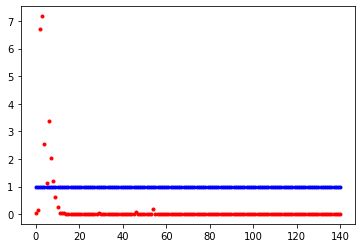

In [16]:
# 모델 반복횟수에 따른 정확도 및 loss를 그래프로 확인
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))


plt.plot(x_len, y_vloss, 'o', c='red',markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue',markersize=3)
plt.show()

In [17]:
#학습기 불러오기
from keras.models import load_model

model= load_model('./credit/41-0.0133.hdf5')

#평가
print(model.evaluate(X_test,Y_test))

#예측
prediction = model.predict(X_test)

# print(prediction)
부정자용자 =int(input('가져올 데이터 번호'))
부정사용 = prediction[부정자용자]
p=부정사용[0]*100


print(f'신용카드를 부정사용 확률은 {p:.4f}%입니다.')

1336/1336 [==============================] - 1s 343us/step - loss: 0.0115 - accuracy: 0.9985
[0.011510772630572319, 0.9985019564628601]
가져올 데이터 번호7
신용카드를 부정사용 확률은 0.2208%입니다.


-----

# 0 : 492개, 1: 492개

In [18]:
df['Class'].value_counts()
# 출력층 몇개 있는지 확인하려고 클래스값 확인

0    284315
1       492
Name: Class, dtype: int64

In [19]:
df_class_0 = df[df['Class'] == 0].sample(492)
df_class_0 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,normalAmount,Class
26225,33958.0,-1.535821,0.191602,1.616817,0.107770,-0.458116,-0.340610,0.264827,0.473573,-0.545482,...,0.106112,-0.311542,0.112697,-0.122293,0.212961,0.269954,-0.132437,-0.064550,0.231931,0
86319,61177.0,-0.380287,1.177763,1.525612,0.183458,-0.191871,-1.274917,0.760897,-0.135313,-0.505331,...,-0.222487,-0.551668,0.048063,0.879717,-0.214740,0.037228,0.249072,0.104815,-0.335278,0
177124,123048.0,-1.017361,1.508147,-0.782430,0.475826,1.075523,-1.540406,0.743348,0.075873,-0.777363,...,0.213252,0.724633,-0.126560,-0.198785,0.374713,0.092894,-0.043317,0.091424,-0.349231,0
27608,34624.0,-0.758601,-0.195946,2.022157,-2.272191,0.763050,0.551263,0.600992,-0.399396,2.155429,...,-0.184667,0.188097,-0.432666,-1.324006,0.256272,-0.830837,-0.584589,-0.545280,-0.307691,0
156546,108350.0,-0.625133,0.869436,2.245992,-0.322305,0.297692,0.194029,0.485154,-0.172602,1.292575,...,-0.261078,-0.353379,-0.359366,-0.430072,0.275881,-0.741504,-0.214020,-0.158192,-0.308171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120177,75735.0,1.226213,-0.489761,0.770496,-0.907153,-1.092935,-0.339341,-0.759104,0.198982,1.755053,...,0.004814,0.173936,-0.075122,-0.003672,0.475684,-0.679911,0.082023,0.019367,-0.349231,0
33327,37190.0,-0.802557,0.804269,2.801807,0.845983,-0.744898,-0.000065,0.042982,0.195344,-0.108213,...,0.296091,0.956422,-0.244473,0.421427,0.299734,-0.106883,0.366922,0.164440,-0.169237,0
139290,83090.0,1.308233,-0.430137,-0.115292,-0.622978,-0.757243,-1.152110,-0.022722,-0.294667,-1.492340,...,-0.322530,-0.547070,-0.023115,0.578937,0.372956,1.038151,-0.097131,-0.006101,-0.182311,0
62959,50492.0,0.975164,-1.379533,0.958565,-0.594336,-1.395282,0.787762,-1.291359,0.444900,-0.254946,...,0.484783,1.172820,-0.160345,-0.250580,0.203319,-0.015497,0.049435,0.029451,0.206503,0


In [20]:
df_class_0['Class'].value_counts()

0    492
Name: Class, dtype: int64

In [21]:
df_class_1 = df[df['Class'] == 1]
df_class_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,normalAmount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [22]:
df_class_1['Class'].value_counts()

1    492
Name: Class, dtype: int64

In [23]:
df_sample = pd.concat([df_class_0,df_class_1])
df_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,normalAmount,Class
26225,33958.0,-1.535821,0.191602,1.616817,0.107770,-0.458116,-0.340610,0.264827,0.473573,-0.545482,...,0.106112,-0.311542,0.112697,-0.122293,0.212961,0.269954,-0.132437,-0.064550,0.231931,0
86319,61177.0,-0.380287,1.177763,1.525612,0.183458,-0.191871,-1.274917,0.760897,-0.135313,-0.505331,...,-0.222487,-0.551668,0.048063,0.879717,-0.214740,0.037228,0.249072,0.104815,-0.335278,0
177124,123048.0,-1.017361,1.508147,-0.782430,0.475826,1.075523,-1.540406,0.743348,0.075873,-0.777363,...,0.213252,0.724633,-0.126560,-0.198785,0.374713,0.092894,-0.043317,0.091424,-0.349231,0
27608,34624.0,-0.758601,-0.195946,2.022157,-2.272191,0.763050,0.551263,0.600992,-0.399396,2.155429,...,-0.184667,0.188097,-0.432666,-1.324006,0.256272,-0.830837,-0.584589,-0.545280,-0.307691,0
156546,108350.0,-0.625133,0.869436,2.245992,-0.322305,0.297692,0.194029,0.485154,-0.172602,1.292575,...,-0.261078,-0.353379,-0.359366,-0.430072,0.275881,-0.741504,-0.214020,-0.158192,-0.308171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [24]:
X =df_sample.values[:,0:30] #독립변수
Y =df_sample.values[:,30] #종속변수 , 31만
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.3) #85 : 15니까
print(X_train.shape) # 85프로
print(X_test.shape) #15프로

(688, 30)
(296, 30)


In [25]:
#모델 설정
model_1 = Sequential()
model_1.add(Dense(30, activation='relu', input_dim=X.shape[1]))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model_1.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics= ['accuracy'])

# #모델 저장 폴더 지정
# MODEL_DIR='./credit/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)

# #모델 저장 방법
# modelpath = './credit/{epoch:02d}-{val_loss:.4f}.hdf5'
# checkpointer =  ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
    
# 학습 조기 종료 , callbacks=[checkpointer, early_stopping_callback]
# early_stopping_callback= EarlyStopping(monitor='val_loss', patience=10)


#모델 학습
history = model_1.fit(X_train, Y_train , epochs=1000, batch_size=100)
model.summary()

Epoch 1/1000
7/7 [==============================] - 0s 832us/step - loss: 8598.3475 - accuracy: 0.4896
Epoch 2/1000
7/7 [==============================] - 0s 831us/step - loss: 6379.3267 - accuracy: 0.4943
Epoch 3/1000
7/7 [==============================] - 0s 997us/step - loss: 5579.7595 - accuracy: 0.4614
Epoch 4/1000
7/7 [==============================] - 0s 997us/step - loss: 4211.0540 - accuracy: 0.4605
Epoch 5/1000
7/7 [==============================] - 0s 830us/step - loss: 2866.7889 - accuracy: 0.4829
Epoch 6/1000
7/7 [==============================] - 0s 996us/step - loss: 1857.0473 - accuracy: 0.4982
Epoch 7/1000
7/7 [==============================] - 0s 665us/step - loss: 1086.9372 - accuracy: 0.5017
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: 458.9912 - accuracy: 0.5029
Epoch 9/1000
7/7 [==============================] - 0s 992us/step - loss: 91.0491 - accuracy: 0.4989
Epoch 10/1000
7/7 [==============================] - 0s 831us/step - loss: 127

7/7 [==============================] - 0s 665us/step - loss: 5.5225 - accuracy: 0.5559
Epoch 82/1000
7/7 [==============================] - 0s 663us/step - loss: 0.6950 - accuracy: 0.7141
Epoch 83/1000
7/7 [==============================] - 0s 665us/step - loss: 3.9801 - accuracy: 0.6007
Epoch 84/1000
7/7 [==============================] - 0s 499us/step - loss: 6.2678 - accuracy: 0.6535
Epoch 85/1000
7/7 [==============================] - 0s 665us/step - loss: 7.8431 - accuracy: 0.5675
Epoch 86/1000
7/7 [==============================] - 0s 662us/step - loss: 3.3091 - accuracy: 0.6253
Epoch 87/1000
7/7 [==============================] - 0s 739us/step - loss: 4.9074 - accuracy: 0.5773
Epoch 88/1000
7/7 [==============================] - 0s 827us/step - loss: 1.2258 - accuracy: 0.7454
Epoch 89/1000
7/7 [==============================] - 0s 665us/step - loss: 7.3530 - accuracy: 0.5957
Epoch 90/1000
7/7 [==============================] - 0s 504us/step - loss: 14.5543 - accuracy: 0.5727
Epo

7/7 [==============================] - 0s 827us/step - loss: 4.5104 - accuracy: 0.6452
Epoch 162/1000
7/7 [==============================] - 0s 827us/step - loss: 14.9490 - accuracy: 0.5649
Epoch 163/1000
7/7 [==============================] - 0s 665us/step - loss: 14.5334 - accuracy: 0.6009
Epoch 164/1000
7/7 [==============================] - 0s 836us/step - loss: 15.0167 - accuracy: 0.6063
Epoch 165/1000
7/7 [==============================] - 0s 666us/step - loss: 16.0854 - accuracy: 0.5531
Epoch 166/1000
7/7 [==============================] - 0s 665us/step - loss: 11.9048 - accuracy: 0.5259
Epoch 167/1000
7/7 [==============================] - 0s 828us/step - loss: 4.1111 - accuracy: 0.7052
Epoch 168/1000
7/7 [==============================] - 0s 665us/step - loss: 1.3226 - accuracy: 0.7559
Epoch 169/1000
7/7 [==============================] - 0s 831us/step - loss: 3.5778 - accuracy: 0.7001
Epoch 170/1000
7/7 [==============================] - 0s 666us/step - loss: 4.9125 - accurac

Epoch 241/1000
7/7 [==============================] - 0s 826us/step - loss: 5.6727 - accuracy: 0.6471
Epoch 242/1000
7/7 [==============================] - 0s 831us/step - loss: 3.0259 - accuracy: 0.6589
Epoch 243/1000
7/7 [==============================] - 0s 665us/step - loss: 2.7993 - accuracy: 0.7273
Epoch 244/1000
7/7 [==============================] - 0s 665us/step - loss: 5.5712 - accuracy: 0.6995
Epoch 245/1000
7/7 [==============================] - 0s 499us/step - loss: 4.3676 - accuracy: 0.7012
Epoch 246/1000
7/7 [==============================] - 0s 670us/step - loss: 7.1128 - accuracy: 0.6474
Epoch 247/1000
7/7 [==============================] - 0s 660us/step - loss: 3.3398 - accuracy: 0.6585
Epoch 248/1000
7/7 [==============================] - 0s 665us/step - loss: 1.3602 - accuracy: 0.7470
Epoch 249/1000
7/7 [==============================] - 0s 827us/step - loss: 2.8574 - accuracy: 0.7395
Epoch 250/1000
7/7 [==============================] - 0s 660us/step - loss: 3.0882

7/7 [==============================] - 0s 827us/step - loss: 8.4225 - accuracy: 0.6278
Epoch 322/1000
7/7 [==============================] - 0s 663us/step - loss: 12.2323 - accuracy: 0.5461
Epoch 323/1000
7/7 [==============================] - 0s 665us/step - loss: 11.1971 - accuracy: 0.6917
Epoch 324/1000
7/7 [==============================] - 0s 827us/step - loss: 9.4824 - accuracy: 0.6217
Epoch 325/1000
7/7 [==============================] - 0s 669us/step - loss: 12.2372 - accuracy: 0.6584
Epoch 326/1000
7/7 [==============================] - 0s 660us/step - loss: 9.3501 - accuracy: 0.7002
Epoch 327/1000
7/7 [==============================] - 0s 826us/step - loss: 8.5672 - accuracy: 0.7169
Epoch 328/1000
7/7 [==============================] - 0s 665us/step - loss: 11.6644 - accuracy: 0.5955
Epoch 329/1000
7/7 [==============================] - 0s 665us/step - loss: 11.4083 - accuracy: 0.6426
Epoch 330/1000
7/7 [==============================] - 0s 826us/step - loss: 1.4873 - accurac

7/7 [==============================] - 0s 666us/step - loss: 1.9664 - accuracy: 0.8023
Epoch 402/1000
7/7 [==============================] - 0s 669us/step - loss: 0.8988 - accuracy: 0.8210
Epoch 403/1000
7/7 [==============================] - 0s 827us/step - loss: 0.7236 - accuracy: 0.8513
Epoch 404/1000
7/7 [==============================] - 0s 667us/step - loss: 2.2291 - accuracy: 0.8126
Epoch 405/1000
7/7 [==============================] - 0s 670us/step - loss: 0.5593 - accuracy: 0.8649
Epoch 406/1000
7/7 [==============================] - 0s 831us/step - loss: 0.4102 - accuracy: 0.8890
Epoch 407/1000
7/7 [==============================] - 0s 666us/step - loss: 2.4972 - accuracy: 0.7982
Epoch 408/1000
7/7 [==============================] - 0s 832us/step - loss: 1.3524 - accuracy: 0.8133
Epoch 409/1000
7/7 [==============================] - 0s 660us/step - loss: 4.1270 - accuracy: 0.7157
Epoch 410/1000
7/7 [==============================] - 0s 660us/step - loss: 4.8347 - accuracy: 0.

7/7 [==============================] - 0s 665us/step - loss: 0.6142 - accuracy: 0.8823
Epoch 482/1000
7/7 [==============================] - 0s 830us/step - loss: 2.5474 - accuracy: 0.7890
Epoch 483/1000
7/7 [==============================] - 0s 665us/step - loss: 4.7391 - accuracy: 0.7035
Epoch 484/1000
7/7 [==============================] - 0s 663us/step - loss: 3.6718 - accuracy: 0.6728
Epoch 485/1000
7/7 [==============================] - 0s 667us/step - loss: 2.7362 - accuracy: 0.6909
Epoch 486/1000
7/7 [==============================] - 0s 830us/step - loss: 2.1904 - accuracy: 0.8228
Epoch 487/1000
7/7 [==============================] - 0s 831us/step - loss: 0.5422 - accuracy: 0.8495
Epoch 488/1000
7/7 [==============================] - 0s 665us/step - loss: 1.7033 - accuracy: 0.8112
Epoch 489/1000
7/7 [==============================] - 0s 665us/step - loss: 1.2177 - accuracy: 0.7667
Epoch 490/1000
7/7 [==============================] - 0s 665us/step - loss: 1.0969 - accuracy: 0.

7/7 [==============================] - 0s 831us/step - loss: 2.3972 - accuracy: 0.7681
Epoch 562/1000
7/7 [==============================] - 0s 827us/step - loss: 3.3560 - accuracy: 0.6859
Epoch 563/1000
7/7 [==============================] - 0s 831us/step - loss: 1.9639 - accuracy: 0.8213
Epoch 564/1000
7/7 [==============================] - 0s 831us/step - loss: 0.6345 - accuracy: 0.8712
Epoch 565/1000
7/7 [==============================] - 0s 665us/step - loss: 2.2138 - accuracy: 0.8204
Epoch 566/1000
7/7 [==============================] - 0s 827us/step - loss: 1.3844 - accuracy: 0.8272
Epoch 567/1000
7/7 [==============================] - 0s 827us/step - loss: 1.7653 - accuracy: 0.7449
Epoch 568/1000
7/7 [==============================] - 0s 826us/step - loss: 0.3836 - accuracy: 0.9082
Epoch 569/1000
7/7 [==============================] - 0s 827us/step - loss: 1.3348 - accuracy: 0.8511
Epoch 570/1000
7/7 [==============================] - 0s 662us/step - loss: 1.3732 - accuracy: 0.

7/7 [==============================] - 0s 831us/step - loss: 7.2286 - accuracy: 0.7526
Epoch 642/1000
7/7 [==============================] - 0s 667us/step - loss: 2.8420 - accuracy: 0.8176
Epoch 643/1000
7/7 [==============================] - 0s 665us/step - loss: 1.8870 - accuracy: 0.8192
Epoch 644/1000
7/7 [==============================] - 0s 665us/step - loss: 0.7604 - accuracy: 0.8144
Epoch 645/1000
7/7 [==============================] - 0s 665us/step - loss: 1.1057 - accuracy: 0.8583
Epoch 646/1000
7/7 [==============================] - 0s 834us/step - loss: 1.2259 - accuracy: 0.8193
Epoch 647/1000
7/7 [==============================] - 0s 665us/step - loss: 0.7460 - accuracy: 0.8930
Epoch 648/1000
7/7 [==============================] - 0s 832us/step - loss: 1.9803 - accuracy: 0.8054
Epoch 649/1000
7/7 [==============================] - 0s 660us/step - loss: 6.8302 - accuracy: 0.6098
Epoch 650/1000
7/7 [==============================] - 0s 660us/step - loss: 3.9508 - accuracy: 0.

7/7 [==============================] - 0s 665us/step - loss: 0.6865 - accuracy: 0.8925
Epoch 722/1000
7/7 [==============================] - 0s 665us/step - loss: 1.3486 - accuracy: 0.7809
Epoch 723/1000
7/7 [==============================] - 0s 665us/step - loss: 1.3509 - accuracy: 0.8559
Epoch 724/1000
7/7 [==============================] - 0s 499us/step - loss: 1.5843 - accuracy: 0.8341
Epoch 725/1000
7/7 [==============================] - 0s 665us/step - loss: 2.2909 - accuracy: 0.7511
Epoch 726/1000
7/7 [==============================] - 0s 665us/step - loss: 1.3421 - accuracy: 0.8520
Epoch 727/1000
7/7 [==============================] - 0s 659us/step - loss: 1.2225 - accuracy: 0.8790
Epoch 728/1000
7/7 [==============================] - 0s 499us/step - loss: 1.0065 - accuracy: 0.8337
Epoch 729/1000
7/7 [==============================] - 0s 827us/step - loss: 1.5241 - accuracy: 0.8596
Epoch 730/1000
7/7 [==============================] - 0s 826us/step - loss: 0.3305 - accuracy: 0.

7/7 [==============================] - 0s 665us/step - loss: 1.8295 - accuracy: 0.8449
Epoch 802/1000
7/7 [==============================] - 0s 665us/step - loss: 4.4091 - accuracy: 0.7341
Epoch 803/1000
7/7 [==============================] - 0s 826us/step - loss: 5.8321 - accuracy: 0.7484
Epoch 804/1000
7/7 [==============================] - 0s 829us/step - loss: 5.9403 - accuracy: 0.7217
Epoch 805/1000
7/7 [==============================] - 0s 823us/step - loss: 2.7126 - accuracy: 0.7988
Epoch 806/1000
7/7 [==============================] - 0s 671us/step - loss: 2.6621 - accuracy: 0.7958
Epoch 807/1000
7/7 [==============================] - 0s 663us/step - loss: 2.2634 - accuracy: 0.7509
Epoch 808/1000
7/7 [==============================] - 0s 826us/step - loss: 1.0784 - accuracy: 0.8767
Epoch 809/1000
7/7 [==============================] - 0s 831us/step - loss: 1.3299 - accuracy: 0.8529
Epoch 810/1000
7/7 [==============================] - 0s 665us/step - loss: 1.1395 - accuracy: 0.

7/7 [==============================] - 0s 826us/step - loss: 0.5558 - accuracy: 0.8872
Epoch 882/1000
7/7 [==============================] - 0s 665us/step - loss: 0.9814 - accuracy: 0.8858
Epoch 883/1000
7/7 [==============================] - 0s 827us/step - loss: 1.0840 - accuracy: 0.8379
Epoch 884/1000
7/7 [==============================] - 0s 670us/step - loss: 0.8951 - accuracy: 0.8962
Epoch 885/1000
7/7 [==============================] - 0s 665us/step - loss: 3.4086 - accuracy: 0.7826
Epoch 886/1000
7/7 [==============================] - 0s 669us/step - loss: 4.1789 - accuracy: 0.8013
Epoch 887/1000
7/7 [==============================] - 0s 665us/step - loss: 4.0770 - accuracy: 0.7713
Epoch 888/1000
7/7 [==============================] - 0s 665us/step - loss: 2.1774 - accuracy: 0.8325
Epoch 889/1000
7/7 [==============================] - 0s 831us/step - loss: 1.5897 - accuracy: 0.8363
Epoch 890/1000
7/7 [==============================] - 0s 826us/step - loss: 1.0412 - accuracy: 0.

7/7 [==============================] - 0s 831us/step - loss: 2.2030 - accuracy: 0.8133
Epoch 962/1000
7/7 [==============================] - 0s 666us/step - loss: 3.2814 - accuracy: 0.6941
Epoch 963/1000
7/7 [==============================] - 0s 665us/step - loss: 0.9482 - accuracy: 0.8999
Epoch 964/1000
7/7 [==============================] - 0s 833us/step - loss: 2.1778 - accuracy: 0.8417
Epoch 965/1000
7/7 [==============================] - 0s 613us/step - loss: 4.2245 - accuracy: 0.7756
Epoch 966/1000
7/7 [==============================] - 0s 665us/step - loss: 5.3801 - accuracy: 0.7195
Epoch 967/1000
7/7 [==============================] - 0s 829us/step - loss: 1.4498 - accuracy: 0.8378
Epoch 968/1000
7/7 [==============================] - 0s 661us/step - loss: 0.3830 - accuracy: 0.9047
Epoch 969/1000
7/7 [==============================] - 0s 827us/step - loss: 0.2877 - accuracy: 0.9158
Epoch 970/1000
7/7 [==============================] - 0s 661us/step - loss: 0.3547 - accuracy: 0.